# Language Classification

### Goal
Create a model that can discriminate between English, Afrikaans, and Dutch phrases. A labelled dataset of phrases is provided (lang_data.csv).


### Requirements
- You must implement your machine learning model in Python.
- You are free to use external Python libraries, but pre-trained models may not be used.
- You will have to submit your code, as well as a trained model.
- Include instructions for executing your code with the provided (trained) model.

### Report
In addition to the code and model, you must also submit a report. The report should contain at least the following:
- a brief overview of the libraries used in your implementation,
- a complete overview of any data analyses, preparation, and/or feature extraction that you performed,
- a complete overview of your model’s architecture,
- a complete overview of the training process, including detailed discussions of any specific techniques and/or algorithms used in your implementation,
- an overview of the testing process,
- an overview and discussion of the results, including your model’s performance on each language, and how it can potentially be improved...
- Where applicable, justify any choices you make in your approach.
- Also answer the bonus questions (see below) in your report.


### Bonus Questions
To improve your chances, answer the following questions in your report. You may include these answers as part of discussions throughout your report, or answer them directly in a separate section.
- Discuss two machine learning approaches (other than the one you used in your language classification implementation) that would also be able to perform the task. Explain how these methods could be applied instead of your chosen method.
- Explain the difference between supervised and unsupervised learning.
- Explain the difference between classification and regression.
- In supervised classification tasks, we are often faced with datasets in which one of the classes is much more prevalent than any of the other classes. This condition is called class imbalance. Explain the consequences of class imbalance in the context of machine learning.
- Explain how any negative consequences of the class imbalance problem (explained in question 4) can be mitigated.
- Provide a short overview of the key differences between deep learning and any non-deep learning method.

### Next step in project:

Extract features from text phrases

In [1]:
import csv
import random
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence, text
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution1D
from keras.layers.pooling import MaxPooling2D
#from pylab import *
# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


---
## Data Exploration

X length 2761 shape (2761, 1) type <U317
y length 2761 shape (2761, 1) type <U10
X[0]: ['Ship shape and Bristol fashion']
y[0]: ['English']
Number of examples = 2761
Number of classes = 3

***A few examples from the dataset***
Dance attendance on English
Big fish in a small pond - A English
Hy is ‘n ongeslypte diamant. Afrikaans
Piet Pompies van Soetmelksvlei is nie van hier nie. Afrikaans
Cogito ergo sum English
Tower of strength English
Bullet - Bit the, Bite the English
Innocent until proven guilty English
Haven't got a clue English
The triumph of hope over experience English


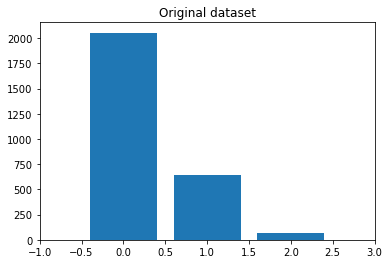

In [9]:
def load_data():
    with open('./lang_data.csv', 'r') as lang_data:
        reader = csv.reader(lang_data)
        lang_data = list(reader)
        lang_data = lang_data[1::]

    # Create lists to accept all valid data
    texts = []
    labels = []
    data = []
    # Loop through phrases
    for phrase in lang_data:
        # Append phrase to data if it has text
        if phrase[0] != '':
            texts.append(phrase[0])
            labels.append(phrase[1])
            data.append(phrase)

    max_length = len(max(data)[0])

    X = np.vstack(texts).astype(np.str)
    y = np.vstack(labels).astype(np.str)

    print('X length {} shape {} type {}'.format(len(X), X.shape, X.dtype))
    print('y length {} shape {} type {}'.format(len(y), y.shape, y.dtype))
    print('X[0]:', X[0])
    print('y[0]:', y[0])

    return texts, labels, X, y

# Display data information
def display_data(texts, labels, title):
    n_classes = len(np.unique(labels))
    print("Number of examples =", len(texts))
    print("Number of classes =", n_classes)

    # Display a few examples from the dataset
    index = np.random.randint(0, len(texts), size=10)
    print()
    print('***A few examples from the dataset***')
    for i in index:
        print(texts[i], labels[i])

    # Display a bar chart of the number of examples per class
    bar = np.zeros((n_classes, 1))
    for i in range(len(labels)):
        if labels[i] == 'English':
            bar[0] += 1
        if labels[i] == 'Afrikaans':
            bar[1] += 1
        if labels[i] == 'Nederlands':
            bar[2] += 1
    # Display bar chart
    plt.bar(np.arange(n_classes), bar, align='center')
    plt.xlim([-1, n_classes])
    plt.title(title)
    plt.show()

# Load data and display data information
texts, labels, X, y = load_data()
display_data(texts, labels, 'Original dataset')

---

## Data Augmentation

In [63]:
# To be done later, if necessary

----

## Design and Test a Model Architecture

In [10]:
# Define Sequential model
def sequential_model(X_train, y_train, batch_size, nb_epoch, validation_split):

    model = Sequential()

#    model.add(LeakyReLU(alpha=0.3))
#    model.add(MaxPooling2D(pool_size=(2, 2)))

#    model.add(Convolution2D(36, 5, 5, border_mode='valid', subsample=(1, 1)))
#    model.add(BatchNormalization())
#    model.add(LeakyReLU(alpha=0.3))
#    model.add(Convolution2D(48, 5, 5, border_mode='valid', subsample=(1, 1)))
#    model.add(BatchNormalization())
#    model.add(LeakyReLU(alpha=0.3))
#    model.add(MaxPooling2D(pool_size=(2, 2)))

#    model.add(Convolution2D(56, 3, 3, border_mode='valid', subsample=(1, 1)))
#    model.add(BatchNormalization())
#    model.add(LeakyReLU(alpha=0.3))
#    model.add(Convolution2D(64, 3, 3, border_mode='valid', subsample=(1, 1)))
#    model.add(BatchNormalization())
#    model.add(LeakyReLU(alpha=0.3))
#    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution1D(64, 3, border_mode='same', input_dim=len(X_train)))

    model.add(Dense(2))   #, input_dim=len(X_train)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

#    model.add(Dense(10))
#    model.add(BatchNormalization())
#    model.add(LeakyReLU(alpha=0.3))        # Suggested - Use ELU
#    model.add(Dropout(0.5))

#    model.add(Dense(1))
#    model.add(BatchNormalization())
#    model.add(Activation('linear'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metric=['accuracy'])

    # Train model
    model.fit(X_train, y_train, batch_size, nb_epoch, validation_split, shuffle='True')





    # Display model summary
    model.summary()

In [11]:
def main(X_train, y_train):

    # Hyperparamters
    batch_size = 128
    nb_epoch = 10
    validation_split = 0.2

    # Run model
    sequential_model(X_train, y_train, batch_size, nb_epoch, validation_split)



# Calls the `main` function above
main(X, y)

Exception: Input 0 is incompatible with layer dense_1: expected ndim=2, found ndim=3